<a href="https://colab.research.google.com/github/eundongg/AI_Practice/blob/main/MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MNIST데이터를 활용하여 MLP 모델을 구현하시오

keras, pytorch, tensorflow어떤 방식이든 원하는 한가지를 선택하여

MLP모델을 구현하고 정확도 0.89(89%)이상이 되도록 하이퍼파라미터를 수정하시오



---
mnist 데이터는 10가지 숫자에 대한 60,000개의 28*28 그레이 스케일 이미지 데이터셋과 10,000개의 이미지로 이루어진 데이터셋


In [47]:
import tensorflow as tf
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.mnist.load_data()

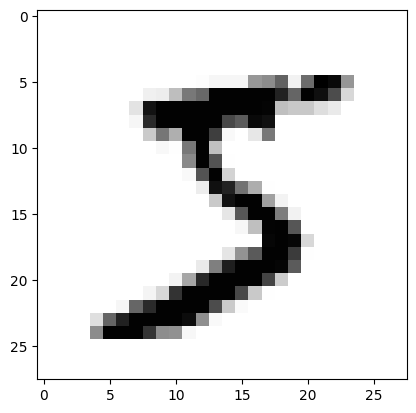

In [48]:
#데이터 확인
import matplotlib.pyplot as plt
plt.imshow(x_train[0],cmap='Greys')
plt.show()

In [49]:
import sys

for x in x_train[0]:
  for i in x:
    sys.stdout.write('%d\t' %i)
  sys.stdout.write('\n')

0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	3	18	18	18	126	136	175	26	166	255	247	127	0	0	0	0	
0	0	0	0	0	0	0	0	30	36	94	154	170	253	253	253	253	253	225	172	253	242	195	64	0	0	0	0	
0	0	0	0	0	0	0	49	238	253	253	253	253	253	253	253	253	251	93	82	82	56	39	0	0	0	0	0	
0	0	0	0	0	0	0	18	219	253	253	253	253	253	198	182	247	241	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	80	156	107	253	253	205	11	0	43	154	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	14	1	154	253	90	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	139	253	190	2	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	11	190	253	70	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	35	241	225	160	108	1	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	81	240	253	253	119	25	0	0	0	0	0	0	0	0	0	


In [50]:
print(x_train.ndim)
print(x_test.ndim)

3
3


In [51]:
# 정규화
x_train = x_train / 255.0
x_test = x_test/255.0

In [52]:
# 이미지를 1차원으로 변경하여 특성 벡터로 변환
x_train = x_train.reshape(-1,28*28)
x_test = x_test.reshape(-1,28*28)
# row에 -1이 들어있으면 행의 개수가 원래 데이터의 차원을 유지하면서 나머지 차원을 가변적으로 맞춰줌


In [53]:
print(x_train.ndim)
print(x_test.ndim)

2
2


In [54]:
# to_categorical 함수는 원핫인코딩으로 변환해주는 함수, tf.keras.utils 모듈 내에 있음
# 각 숫자에 해당하는 인덱스에 1을 표시하고, 나머지 인덱스에는 0으로 표시
# 각 이미지에 대해 해당하는 클래스를 예측하는 데 사용됨
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [55]:
# sequential모델은 딥러닝 모델을 구성하는 가장 간단한 형태, 여러 개의 층을 순차적으로 쌓아 구성하는 방식

model = tf.keras.models.Sequential()
# 이렇게 호출하고 model.add() 메소드를 사용해서 순차적으로 층을 추가해나감
model.add(tf.keras.layers.Dense(64,activation = 'relu', input_shape=(28*28,)))
# 64개의 뉴런을 가진 Dense층을 추가
model.add(tf.keras.layers.Dense(64,activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))
# softmax 함수는 다중 클래스 분류 문제에서 사용되고, 출력 뉴런의 개수를 10으로 설정

In [56]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# adam은 경사 하강법, 자동으로 학습률을 조정하면서 모델을 최적화함
# categorical_crossentropy는 손실함수, 실제 값과 예측 값 사이의 오차를 계산
# metrics=['accuracy']는 모델의 평가 지표, 정확도를 평가 지표로 이용

In [57]:
model.fit(x_train,y_train,epochs=10,batch_size=128,validation_split=0.1)


Epoch 1/10
422/422 [==============================] - 3s 6ms/step - loss: 0.4117 - accuracy: 0.8840 - val_loss: 0.1681 - val_accuracy: 0.9515
Epoch 2/10
422/422 [==============================] - 4s 9ms/step - loss: 0.1754 - accuracy: 0.9487 - val_loss: 0.1190 - val_accuracy: 0.9653
Epoch 3/10
422/422 [==============================] - 2s 5ms/step - loss: 0.1296 - accuracy: 0.9615 - val_loss: 0.1049 - val_accuracy: 0.9690
Epoch 4/10
422/422 [==============================] - 2s 5ms/step - loss: 0.1033 - accuracy: 0.9683 - val_loss: 0.0944 - val_accuracy: 0.9723
Epoch 5/10
422/422 [==============================] - 2s 5ms/step - loss: 0.0865 - accuracy: 0.9740 - val_loss: 0.0917 - val_accuracy: 0.9738
Epoch 6/10
422/422 [==============================] - 2s 5ms/step - loss: 0.0712 - accuracy: 0.9788 - val_loss: 0.0832 - val_accuracy: 0.9765
Epoch 7/10
422/422 [==============================] - 2s 5ms/step - loss: 0.0613 - accuracy: 0.9818 - val_loss: 0.0852 - val_accuracy: 0.9768
Epoch 

In [58]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0890 - accuracy: 0.9738
Test loss: 0.08897826075553894
Test accuracy: 0.973800003528595




---



---

